<a href="https://colab.research.google.com/github/ShinHyun-soo/DLstudy/blob/main/Document_Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation

import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=100, test_split=0.2)
print('x_train 길이:', len(x_train))
print('x_test 길이:', len(x_test))

x_train 길이: 8982
x_test 길이: 2246


In [ ]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]


In [ ]:
reuters_word_idx = reuters.get_word_index()
print( 'vocab 길이:', len(reuters_word_idx.values()))

vocab 길이: 30979


In [ ]:
r_word_idx = dict([(value, key) for (key, value) in
                   reuters_word_idx.items()])
for i in range(1, 6):
  print( r_word_idx[i] )

the
of
to
in
said


In [ ]:
for key in x_train[0]:
  print( r_word_idx[key], end=' ' )

the of of mln loss for of said at of of said of of 1 of of april 0 a after said from of and from of 000 april 0 prices its of year a but in this mln of an of of and of and revs vs 000 its of vs 000 a but 3 of of of and of and of vs 000 its of 4 vs 000 1 mln of of april 0 are 2 of will billion of and of 000 pct dlrs 

In [ ]:
from keras.utils.np_utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

print( y_train[0] )
print( y_train_onehot[0] )

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
def vectorize_sequences(sequences, dimension=100):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [ ]:
x_train_vec = vectorize_sequences(x_train)
x_test_vec = vectorize_sequences(x_test)

print( x_train[0] )
print( x_train_vec[0] )

[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
inputs = Input(shape=(100,))
outputs = Dense(46, activation='softmax')(inputs)
model_v1 = Model(inputs=inputs, outputs=outputs)

model_v1.compile(loss='categorical_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])

In [ ]:
history_1 = model_v1.fit(x_train_vec, y_train_onehot,
                         batch_size=32,
                         epochs=30,
                         verbose=1,
                         validation_split=0.1)

Epoch 1/30
253/253 [==============================] - 1s 4ms/step - loss: 2.4874 - accuracy: 0.4253 - val_loss: 2.0455 - val_accuracy: 0.4939
Epoch 2/30
253/253 [==============================] - 1s 3ms/step - loss: 1.7834 - accuracy: 0.5503 - val_loss: 1.7851 - val_accuracy: 0.5673
Epoch 3/30
253/253 [==============================] - 1s 3ms/step - loss: 1.5802 - accuracy: 0.6019 - val_loss: 1.6638 - val_accuracy: 0.6051
Epoch 4/30
253/253 [==============================] - 1s 3ms/step - loss: 1.4634 - accuracy: 0.6422 - val_loss: 1.5993 - val_accuracy: 0.6296
Epoch 5/30
253/253 [==============================] - 1s 3ms/step - loss: 1.3825 - accuracy: 0.6630 - val_loss: 1.5533 - val_accuracy: 0.6407
Epoch 6/30
253/253 [==============================] - 1s 3ms/step - loss: 1.3215 - accuracy: 0.6791 - val_loss: 1.5241 - val_accuracy: 0.6529
Epoch 7/30
253/253 [==============================] - 1s 3ms/step - loss: 1.2816 - accuracy: 0.6907 - val_loss: 1.5092 - val_accuracy: 0.6730
Epoch 

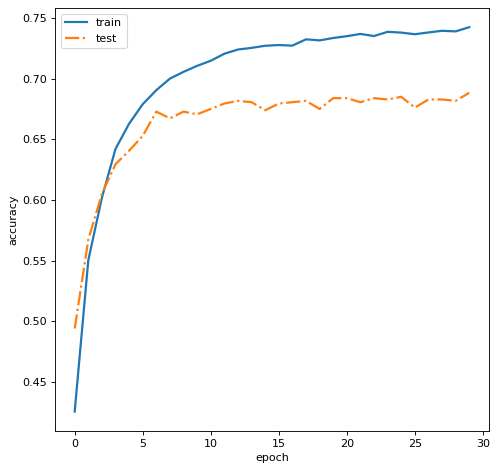

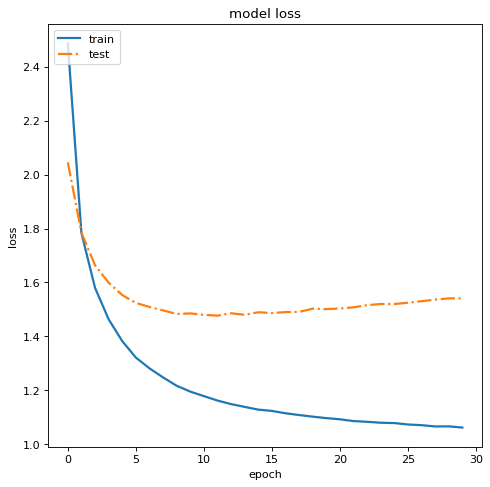

In [ ]:
plt.figure(figsize=(7, 7), dpi = 80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['accuracy'], '-', linewidth=2)
plt.plot(history_1.history['val_accuracy'], '-.', linewidth=2)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['loss'], '-', linewidth=2)
plt.plot(history_1.history['val_loss'], '-.', linewidth=2)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score_1 = model_v1.evaluate(x_test_vec, y_test_onehot,
                            batch_size=32, verbose=1)
print('Test score:', score_1[0])
print('Test accuracy:', score_1[1])

71/71 [==============================] - 0s 3ms/step - loss: 1.4925 - accuracy: 0.6861
Test score: 1.4925363063812256
Test accuracy: 0.6861086487770081


In [ ]:
def get_model_v2(input_shape):
  inputs = Input(shape=(input_shape,))
  hidden1 = Dense(256, activation='relu')(inputs)
  dropout = Dropout(0.5)(hidden1)
  outputs = Dense(46, activation='softmax')(dropout)
  model = Model(inputs=inputs, outputs=outputs)

  return model

In [ ]:
model_v2 = get_model_v2(input_shape=100)
model_v2.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
history_2 = model_v2.fit(x_train_vec, y_train_onehot,
                         batch_size=32,
                         epochs=30,
                         verbose=1,
                         validation_split=0.1)

Epoch 1/30
253/253 [==============================] - 1s 3ms/step - loss: 1.9013 - accuracy: 0.5406 - val_loss: 1.5526 - val_accuracy: 0.6474
Epoch 2/30
253/253 [==============================] - 1s 3ms/step - loss: 1.4513 - accuracy: 0.6449 - val_loss: 1.4184 - val_accuracy: 0.6674
Epoch 3/30
253/253 [==============================] - 1s 3ms/step - loss: 1.3197 - accuracy: 0.6717 - val_loss: 1.3757 - val_accuracy: 0.6819
Epoch 4/30
253/253 [==============================] - 1s 3ms/step - loss: 1.2589 - accuracy: 0.6827 - val_loss: 1.3324 - val_accuracy: 0.6941
Epoch 5/30
253/253 [==============================] - 1s 3ms/step - loss: 1.2003 - accuracy: 0.6968 - val_loss: 1.3039 - val_accuracy: 0.6897
Epoch 6/30
253/253 [==============================] - 1s 3ms/step - loss: 1.1547 - accuracy: 0.7044 - val_loss: 1.3000 - val_accuracy: 0.6963
Epoch 7/30
253/253 [==============================] - 1s 3ms/step - loss: 1.1243 - accuracy: 0.7117 - val_loss: 1.2852 - val_accuracy: 0.6930
Epoch 

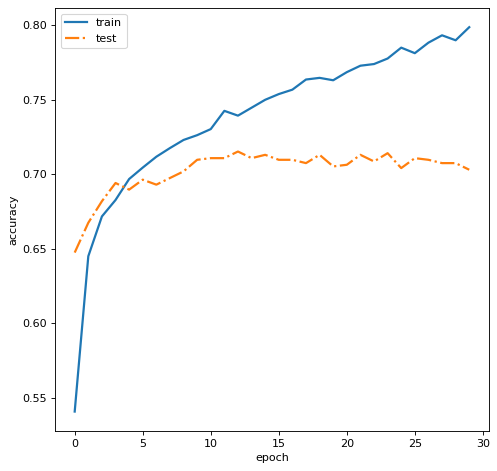

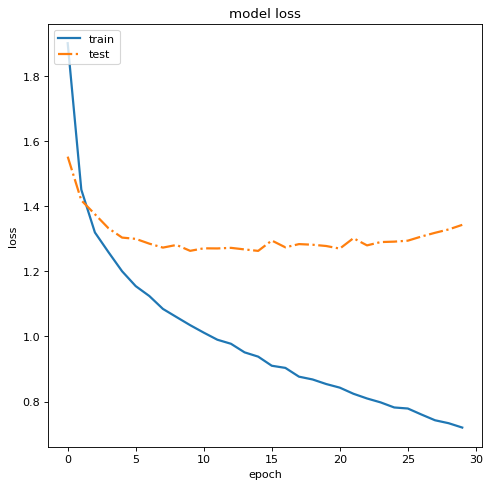

In [ ]:
plt.figure(figsize=(7, 7), dpi = 80, facecolor='w', edgecolor='k')
plt.plot(history_2.history['accuracy'], '-', linewidth=2)
plt.plot(history_2.history['val_accuracy'], '-.', linewidth=2)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_2.history['loss'], '-', linewidth=2)
plt.plot(history_2.history['val_loss'], '-.', linewidth=2)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score_2 = model_v2.evaluate(x_test_vec, y_test_onehot,
                            batch_size=32, verbose=1)
print('Test score:', score_2[0])
print('Test accuracy:', score_2[1])

71/71 [==============================] - 0s 3ms/step - loss: 1.3000 - accuracy: 0.6990
Test score: 1.3000410795211792
Test accuracy: 0.699020504951477


In [ ]:
max_words = 10000
batch_size = 32
epochs = 30

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

x_train_vec = vectorize_sequences(x_train,
                                  dimension=max_words)
x_test_vec = vectorize_sequences(x_test, dimension=max_words)

model_v2 = get_model_v2(max_words)
model_v2.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
model_v2.summary()

history_2_2 = model_v2.fit(x_train_vec, y_train_onehot,
                           batch_size=batch_size,
                           epochs=epochs,
                           verbose=1,
                           validation_split=0.1)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense_5 (Dense)             (None, 256)               2560256   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 46)                11822     
                                                                 
Total params: 2,572,078
Trainable params: 2,572,078
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
253/253 [==============================] - 1s 5ms/step - loss: 1.3984 - accuracy: 0.6984 - val_loss: 1.0274 - val_accuracy: 0.7764
Epoch 2/30
253/253 [===================

71/71 [==============================] - 0s 3ms/step - loss: 1.3920 - accuracy: 0.7890
Test score: 1.3919838666915894
Test accuracy: 0.7889581322669983


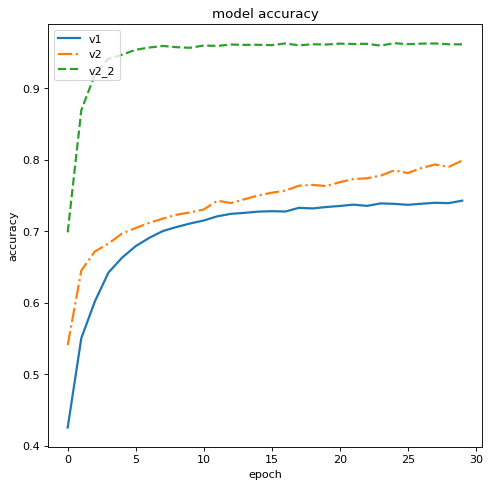

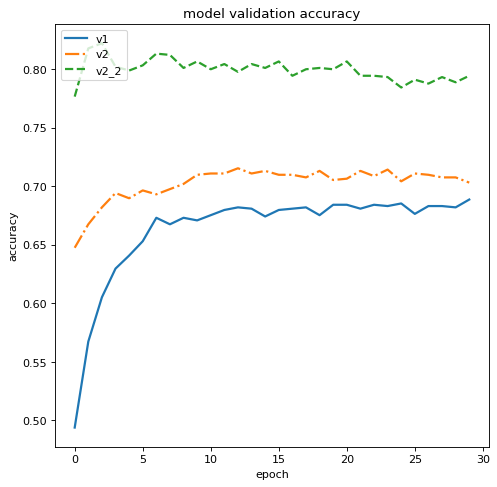

In [ ]:
score_2_2 = model_v2.evaluate(x_test_vec, y_test_onehot,
                              batch_size=32, verbose=1)
print('Test score:', score_2_2[0])
print('Test accuracy:', score_2_2[1])

plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['accuracy'], '-', linewidth=2)
plt.plot(history_2.history['accuracy'], '-.', linewidth=2)
plt.plot(history_2_2.history['accuracy'], '--', linewidth=2)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['v1', 'v2', 'v2_2'], loc='upper left')
plt.show()

plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['val_accuracy'], '-', linewidth=2)
plt.plot(history_2.history['val_accuracy'], '-.', linewidth=2)
plt.plot(history_2_2.history['val_accuracy'], '--', linewidth=2)
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['v1', 'v2', 'v2_2'], loc='upper left')
plt.show()

In [51]:
import numpy as np

def pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0):
    lengths = [len(s) for s in sequences]

    nb_samples = len(sequences)
    if maxlen is None:
        maxlen = np.max(lengths)

    # take the sample shape from the first non empty sequence
    # checking for consistency in the main loop below.
    sample_shape = tuple()
    for s in sequences:
        if len(s) > 0:
            sample_shape = np.asarray(s).shape[1:]
            break

    x = (np.ones((nb_samples, maxlen) + sample_shape) * value).astype(dtype)
    for idx, s in enumerate(sequences):
        if len(s) == 0:
            continue  # empty list was found
        if truncating == 'pre':
            trunc = s[-maxlen:]
        elif truncating == 'post':
            trunc = s[:maxlen]
        else:
            raise ValueError('Truncating type "%s" not understood' % truncating)

        # check `trunc` has expected shape
        trunc = np.asarray(trunc, dtype=dtype)
        if trunc.shape[1:] != sample_shape:
            raise ValueError('Shape of sample %s of sequence at position %s is different from expected shape %s' %
                             (trunc.shape[1:], idx, sample_shape))

        if padding == 'post':
            x[idx, :len(trunc)] = trunc
        elif padding == 'pre':
            x[idx, -len(trunc):] = trunc
        else:
            raise ValueError('Padding type "%s" not understood' % padding)
    return x


In [54]:
from keras.layers import Embedding, LSTM
from keras.optimizers import Adam
from keras.preprocessing import sequence

num_words = 10000
max_words = 96
batch_size = 256
epochs = 30

def get_lstm_model(input_shape):
  inputs = Input(shape=(input_shape,))
  inputs_emb = Embedding(num_words, input_shape)(inputs)
  hidden2 = LSTM(96, dropout=0.3, recurrent_dropout=0.3, return_sequences=False, activation='tanh')(inputs_emb)
  outputs = Dense(46, activation='softmax')(hidden2)
  model = Model(inputs=inputs, outputs=outputs)

  return model

(x_train, y_trian), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

x_train_seq = pad_sequences(x_train, maxlen=max_words, padding='post', truncating='post')
x_test_seq = pad_sequences(x_test, maxlen=max_words, padding='post', truncating='post')

_adam = Adam(lr=0.001)

model_v3 = get_lstm_model(max_words)
model_v3.compile(loss='categorical_crossentropy',
                 optimizer=_adam,
                 metrics=['accuracy'])
model_v3.summary()

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 96)]              0         
                                                                 
 embedding (Embedding)       (None, 96, 96)            960000    
                                                                 
 lstm (LSTM)                 (None, 96)                74112     
                                                                 
 dense_7 (Dense)             (None, 46)                4462      
                                                                 
Total params: 1,038,574
Trainable params: 1,038,574
Non-trainable params: 0
_________________________________________________________________


In [55]:
history_3 = model_v3.fit(x_train_seq, y_train_onehot,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_split=0.1)

Epoch 1/30
32/32 [==============================] - 20s 515ms/step - loss: 2.9436 - accuracy: 0.3260 - val_loss: 2.4384 - val_accuracy: 0.3315
Epoch 2/30
32/32 [==============================] - 16s 505ms/step - loss: 2.3221 - accuracy: 0.3768 - val_loss: 2.3077 - val_accuracy: 0.3749
Epoch 3/30
32/32 [==============================] - 17s 529ms/step - loss: 2.1999 - accuracy: 0.4080 - val_loss: 2.2194 - val_accuracy: 0.4527
Epoch 4/30
32/32 [==============================] - 17s 530ms/step - loss: 2.0436 - accuracy: 0.4858 - val_loss: 2.0872 - val_accuracy: 0.4672
Epoch 5/30
32/32 [==============================] - 17s 534ms/step - loss: 2.0346 - accuracy: 0.4727 - val_loss: 2.0137 - val_accuracy: 0.4894
Epoch 6/30
32/32 [==============================] - 17s 546ms/step - loss: 1.9177 - accuracy: 0.5079 - val_loss: 1.9242 - val_accuracy: 0.5406
Epoch 7/30
32/32 [==============================] - 16s 506ms/step - loss: 1.8197 - accuracy: 0.5309 - val_loss: 1.8144 - val_accuracy: 0.5495

In [56]:
score_3 = model_v3.evaluate(x_test_seq, y_test_onehot,
                            batch_size=32, verbose=1)
print('Test score:', score_3[0])
print('Test accuracy:', score_3[1])

71/71 [==============================] - 2s 29ms/step - loss: 1.3180 - accuracy: 0.6963
Test score: 1.3179821968078613
Test accuracy: 0.6963490843772888
